In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from scipy import stats

from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Turn off pink warning boxes in notebook
import warnings
warnings.filterwarnings("ignore")

# Import created modules
import env

# Handle large numbers w/o using scientific notation
pd.options.display.float_format = '{:.3f}'.format

<a id='model'></a>
## Linear Regression

___

### **<font color=red>What is Linear Regression?</font>**

**Regression is a Supervised Machine Learning technique** because we will be using **labeled data** where each example is a pair consisting of input value(s) and a desired output value. **Human involvement** is needed to feed the algorithm with training data containing the input(s)/predictor(s) and show it the correct output/target, so that the algorithm can 'learn' patterns from **historical data**, which it can use to predict outcomes for new, unseen data sets.


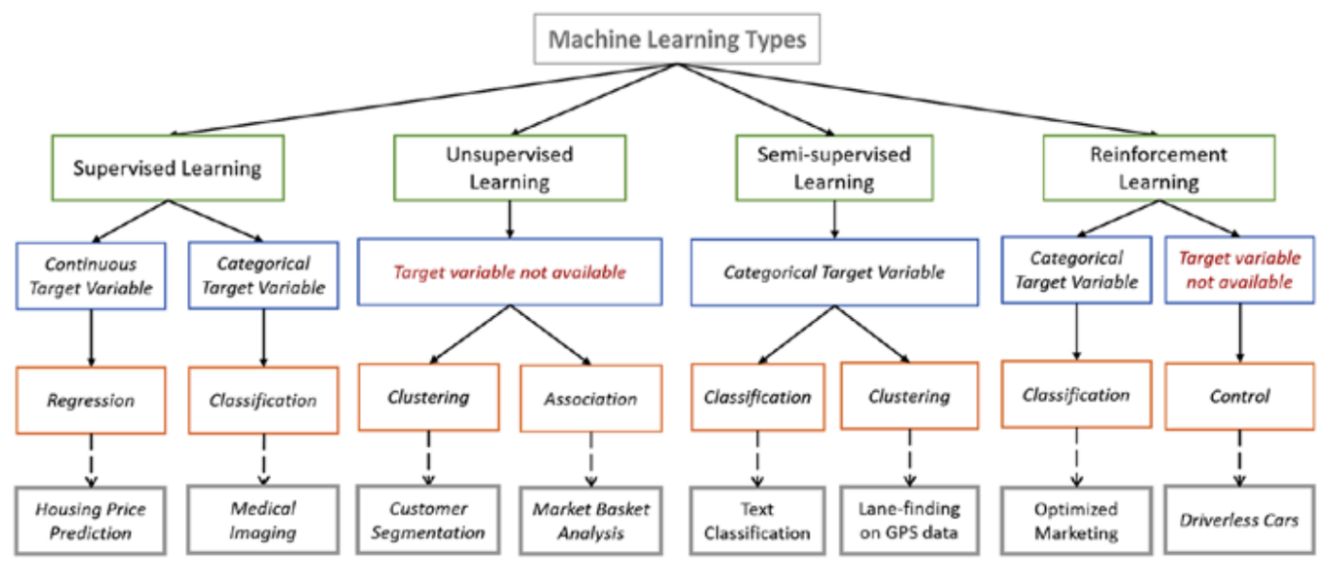

___

**A Simple Univariate Linear Regression** is used to model the relationship between **one independent or explanatory variable** and one continuous target or dependent variable using a straight line. The goal is to find the Line of Best Fit by finding the parameters, slope and y-intercept, that define the line and minimize regression errors.

>Ex. I want to use one feature, SAT score, to predict my continuous target variable, Freshman GPA.

**A Multiple Univariate Regression** is used to model the relationship between **more than one independent or explanatory variable** and one continuous target or dependent variable using a plane of best fit that minimizes regression errors. These can be linear and nonlinear. **Multiple Regressions assume no major correlation between the independent variables.**

>Ex. I want to use multiple features, square feet, bedroom count, bathroom count, to predict my continuous target variable, home value. 

**Important Terms**

**X** - independent variable(s), predictor(s), feature(s) 

```python
x = df['feature']
```

OR

```python
# Capital 'X' signifies multiple features

X = df[['feature1', 'feature2']]
```

**y** - dependent variable, regressor, target, label

```python
y = ['target']
```

___

### **<font color=orange>So What?</font>**

Here are a few of the main reasons people use regression analysis:

> - to predict future economic conditions, trends, or values
> - to determine the relationship between two or more variables
> - to understand how a change in an independent variable affects change in a dependent variable

___

### **<font color=green>Now What?</font>**

We will work through the data science pipeline focused on preparing for Regression Modeling.

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Acquiring and Preparing - Wrangling

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What is Wrangling?</font>**

Data Wrangling is another way to say acquiring and preparing data, so it can be explored for insights or work well with machine learning algorithms. It can involve reading in data from a csv file, a SQL database, or wherever your data may be housed, it may require joins, and it will almost certainly require some cleaning. 

___

### **<font color=orange>So What?</font>**

Since you seriously will spend most of your time in the wrangle stage of the data science pipeline, let's get comfortable in here!

**Data Acquisition -** Read the data into a pandas DataFrame to use in your project.

<div class="alert alert-block alert-info">
<b>Tip:</b> If you read your data into a dataframe from a csv file and find that you have an extra column called 'Unnamed: 0', adding `index_col=0` will get rid of that.
</div>

```python
df = pd.read_csv('your_data.csv', index_col=0)
```

OR

```python
from env import host, password, user

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = 'Write your sql query here; test it in Sequel Pro first!'

pd.read_sql(sql_query, connection_url)
```

#### Put it all together 

Create a single function and throw it into your `acquire.py` or `wrangle.py` file.

```python
def get_zillow_data():
    return pd.read_sql(query, get_connection('zillow')
```

___

<a id='characterization_and_summarization'></a>
#### Data Characteristics and Summarization 

Once you read your data into a pandas DataFrame, you will want to do some data summarization to understand what shape your data is in, what the data types are, take a look at some descriptive statistics, discover unique values for each column with a count, and basically decide how much cleaning your data may require. 

```python
df.head()

df.shape

df.columns

df.info()

df.describe()

df.isna().sum()

df.column.value_counts(dropna=False)
```

- It's a great idea to take a look at the shape of your data at the beginning of each stage in the pipeline. You might think about running this little snippet.

```python
print(f'My original dataframe is coming in with {df.shape[0]} rows and {df.shape[1]} columns.')
```

___

This is one way to check for any values less than 0 in a column/Series. It should return nothing if there are no values of 0 or less. If there are values of 0 or less, you will get an `AssertionError`. You might think about using this to test conditions in your data that should NEVER happen.

```python
assert(df['col1'] >= 0 ).all()
``` 

- The `.all()` method will check if all the elements in the object pass the assert, while `.any()` will check if any of the elements in the objects pass the assert test. *(You could use `a.empty`, `a.bool()`, `a.item()`, `a.any()`, or `a.all()`)*

___

### **<font color=green>Now What?</font>**

You should end this section with a `wrangle.py` file that puts all of the code you used to acquire and clean your data into helper functions that feed a final wrangle function. This step should make your process repeatable, not only for when you acquire new data, but for others trying to replicate your process.

<a id='errors_and_outliers'></a>

#### Errors and Outliers 

Once you decide how you want to deal with any problematic or NaN values, here are lots of useful code snippets in one place to get you started!

**Filter out extreme values.**

```python
df['column'] = df[df.column < number]

df['column'] = df[df.column > number]

df['column'] = df[mask for condition]
```
**Set lower- and upperbound values using a common formula with IQR as a filter for extreme values in a column if you want.**

```python
# Calculate the interquartile range for your column

q1, q3 = df.column.quantile([.25, .75])

iqr = q3 - q1

# Create variables holding upper and lower cutoff values using common formula. Tweak as you like.

upperbound = q3 + 1.5 * iqr

lowerbound = q1 - 1.5 * iqr

# Filter the column using your variables and reassign to your dataframe.

df['column'] = df[~df.column > upperbound]

df['column'] = df[~df.column < lowerbound]

```

___

#### Missing Values - Fill and Drop

You may find that you need to deal with missing values. No problem!

**Fill NaN with some_constant_number**

```python
df['column'] = df['column'].fillna(some_constant_number)
```

**Fill NaN with 99, for example.**

```python
df['column'] = df['column'].fillna(99)
```

**Fill NaN with the mean or median of the column**

```python
df['column'] = df['column'].fillna(df['column'].mean())

df['column'] = df['column'].fillna(df['column'].median())
```

**Drop columns or rows that have any NaN values. (a little drastic)**

```python
df.dropna(axis=1)

df.dropna(axis=0)
```

**Only keep columns which have at least 90% non-NaNs (axis=0 for rows). (a bit more refined)**

```python
df.dropna(thresh=int(df.shape[0] * .9), axis=1)
```

___

#### Replace and Create

**Replace all of a specified value in a Series with another value using `.replace()`**

```python
df.Series.replace(original_value, desired_value, inplace=True)
```

**Create a new column based on a condition of another column using `np.where()`**

```python
df['new_column'] = np.where(this_is_true, do_this, else_do_that)

# This is a simple example using the mpg dataset you know and love.

df['new_column'] = np.where(df['col'].str.startswith('auto'), 'automatic', 'manual')`
```

**Three level nesting with `np.where()`. This can get real cool...**

```python
df['new_column'] = np.where(if_this_condition_is_true_one, do_this, 
                      np.where(if_this_condition_is_true_two, do_this, 
                         np.where(if_this_condition_is_true_three, do_this, else_this)))
```

**Create a new column based on an existing column using `.map()`**

```python
df['new_column'] = Series.map({'original string': 'new_string', 'original_string2': 'new_string2'})

df['new_column'] = Series.map({original_value: new_value, original_value2: new_value2})

df['percent'] = df['proportion'].map(lambda x: x*100)
```

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Splitting

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What is Splitting?</font>**

At this stage, you will create train (in-sample), validate (out-of-sample), and test (out-of-sample) dataframes using the train_test_split function from Sklearn. This will randomly split your dataset into train, validate, and test by the percentage you pass into the function. You will use the train set to do exactly that, train your model to make predictions. You will use your validate set to evalute your model's performance on unseen data and ensure that it didn't learn too much from your train set causing it to 'overfit' on a particular set of data. You will repeat that process for each model you create, and finally you will choose your best model to use with your test dataset.

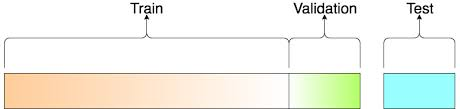

<div class="alert alert-block alert-warning">
<b>Be Aware:</b> You may need to stratify your split on a particular feature, so that the proportion of a feature's values is the same in your train, validate, and test datasets. You can pass the stratify parameter as an option to your train_test_split.
</div>

```python
from sklearn.model_selection import train_test_split

# Create test dataset

train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123, 
                                        stratify=df.target)
# Create train and validate datsets

train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.target)

# Take a look at your split datasets

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

```

___

### **<font color=orange>So What?</font>**

You may **explore individual variables before splitting** your data into train, validate, and test datasets, so that you can look at distributions, identify outliers, Nulls, etc. However, **when looking at interactions of variables**, your data should first be split before you explore. You should also split your data **before** you scale. This is because your validate and test data should remain unseen as much as possible as it is supposed to be unknown at this stage.

*An important component of Data Science is that peers must be able to replicate what you have done to your data, especially if you are going to deploy your model to be used in the future. By splitting your data into train, validate, and test sets early on in the pipeline, you are also confirming that any processing you completed on your train set is repeatable on your validate and test datasets as well as unseen future sets.*

___

### **<font color=green>Now What?</font>**

#### Define X and y

Decide on your independent variable(s), X, and dependent variable, y. I will use these dataframes below in modeling, but I made the decision to define them here. **This is just a personal choice.**

```python
X_train = train[['independent_var1', 'independent_var2', 'independent_var3']]

y_train = train['dependent_var']

X_validate = validate[['independent_var1', 'independent_var2', 'independent_var3']]

y_validate = validate['dependent_var']

X_test = test[['independent_var1', 'independent_var2', 'independent_var3']]

y_test = test['dependent_var']
```
If you are using all of the columns in your dataset except for the target as features, you might want to use this syntax instead of the above. It just saves a lot of typing to drop the target column for your X instead of typing out all of the feature columns. **This is up to you.**

```python
X_train = train.drop(columns='dependent_var')

y_train = train['dependent_var']

X_validate = validate.drop(columns='dependent_var')

y_validate = validate['dependent_var']

X_test = test.drop(columns='dependent_var')

y_test = test['dependent_var']
```

<font color=purple>Do a quick check. Although the row count will differ, the column count should not. Always make sure the data you're working with is the data you THINK you're working with.</font>

```python
print(f'X_train -> {X_train.shape}')
print(f'X_validate -> {X_validate.shape}')
print(f'X_test -> {X_test.shape}')
```

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Scaling

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What is Scaling?</font>**

To scale your data is basically to change the range of values of your features while preserving their distributions. Scaling your features in a Multiple Linear Regression when they have different units of measurement ensures that your ML algorithm does not emphasize your variables with larger measurement scales. In other words, since most ML algorithms pay no attention to units of measurement, scaling allows all of your features to contribute equally to your algorithm.

**Standardization (Z-score Normalization) -** This is when you scale your features so that they have the properties of a standard normal distribution where $\mu$ = 0 and $\sigma$ = 1. It replaces your values with their Z-scores.

**Normalization -** This scales the data to a fixed range, usually 0 to 1. One of the costs of this range is that you will end up with smaller standard deviations which **can supress outliers**. You should take this into consideration when deciding on a Min-Max Scaler or data Normalization. 

[Here](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) is a gret introductory article on different scalers.

___

### **<font color=orange>So What?</font>**

**Why is scaling useful?**

First and foremost, if you don't need to scale your data, don't! It adds complexity to your data, so never scale for scaling sake. That being said, scaling can help you better explore patterns in some data or it may be a necessary step before running statistical tests or applying machine learning algorithms.

Most Machine Learning algorithms use Euclidean distance between two data points in their computations. **If you are using more than one feature to predict your target**, and your features use different units of measurement, then scaling the data ensures that variables are weighted equally. *There are some algorithms that do not benefit from scaling such as tree-based methods and Naive Bayes.*

>For Example: 3500 square feet and 5 bedrooms. The feature of square feet will weigh a lot more than the bedrooms feature.

You may need to scale data that is not a normal distribution to be a normal distribution **for statistical testing**. However, it is not always possible to just scale the feature to a normal distribution. You may need to first drop the outliers and then scale it, which will help it turn into a normal distribution.

___

**Which scaler should I use?**

- All things being equal, use the simplest one. StandardScaler and MinMaxScaler are the most commonly used and are a great place to start. 


- Do you need your outliers to look like outliers? Do you need to maintain the space between your values or do you want to Normalize the space between values.


- [This link](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) will take you to a great comparison of scalers with visual explanations!

**Below is a lot of information about scalers, so just take what makes sense to you, what you can handle right now, and leave the rest for future exploration and study.**

___

**Linear transformations**

- **MinMaxSclaer (min-max Normalization) -** This changes the units on the x-axis by scaling your values to range between 0 and 1, but it does not change the distribution or shape of your data. This preserves the distance between each value. **This scaler is very sensitive to the presence of outliers.**


- **Standarized Scaler (z-score Standardization) -** This scaler removes the mean and scales the data to unit variance making it more understandable. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. **This scaler is very sensitive to the presence of outliers.**


- **Robust Scaler -** Preserves your outliers making it 'robust' to outliers in your dataset. The centering and scaling statistics of this scaler are based on percentiles and are therefore **not influenced by a few number of very large marginal outliers.** 

___

**Non-linear transformations**

*Non-linear transformations can change the outcome of your statistical tests, and actually the underlying assumption of a T-Test, for example, is that your data has a normal distribution, so if you start with data that is NOT normally distributed, a non-linear transformer can help you prepare your data for statistical tests.*

- **Quantile and Power Transformations -** **QuantileTransformer** provides non-linear transformations in which distances between marginal outliers and inliers are shrunk. **PowerTransformer** provides non-linear transformations in which data is mapped to a normal distribution to stabilize variance and minimize skewness. It applies a power transformation to each feature to make the data more Gaussian-like. *These transformations tend to spread out the most frequent values.* 


- **Uniform or Normal Distributioins -** These are both `output_distribution` types for the QuantileTransformer. The default output_distribution is uniform and applies the non-linear transformation such that the probability density function of each feature will be mapped to a uniform distribution. When set to normal, it rescales the vector for each sample to have unit norm, independently of the distribution of the samples.


- **Box-Cox v  Yeo-Johnson -** These are both methods of PowerTransformer that return zero means and normalize unit variance. Yeo-johnson allows for negative data while box-cox allows positive data only.

___________

**Log transformations -** This technique helps to handle skewed data, and after transformation, the distribution becomes more approximate to normal. It takes a dataset with differences in orders of magnitude (1, 10, 100, 1000, 10_000) and changes the scale of the y-axis to a log scale which allows us to see differences better. It handles datasets with exponential curves better, think Telco Tenure, Zillow Home Values, or our current pandemic!)

```python
out_array = np.log(in_array)
```

___________

### **<font color=green>Now What?</font>**

```python
# Import desired scalers from sklearn.preprocessing

from sklearn.preprocessing import StandardScaler
```

**Create** -> Create the Scaler Object. (The choice of scalers is up to you.)

```python
# This example uses the StandardScaler on Zillow dataset.

scaler = StandardScaler()
``` 

**Fit** -> Fit the Scaler Object on **train only**.

```python
# Create variable to hold a list of 1 or more column names I want to scale.

columns_to_scale = ['bedrooms', 'bathrooms', 'square_feet']

OR

columns_to_scale = ['square_feet']

# Fit the scaler I created above on the train dataset columns I want to scale.

scaler.fit(train[columns_to_scale])

# Create column names that add _scaled to the end of original column names.

new_column_names = [c + '_scaled' for c in columns_to_scale]

```

**Transform** -> Transform train, validate, and test using the Scaler Object we fit on our train dataset.

<div class="alert alert-block alert-warning">
<b>Remember:</b> SKlearn returns a 2D numpy array from its transformation, so you can use the following code to return your transformed (scaled) data as a Pandas DataFrame.</div>

```python
train_scaled = pd.concat([
                        train,
                        pd.DataFrame(scaler.transform(train[columns_to_scale]), 
                        columns=new_column_names, 
                        index=train.index)],
                        axis=1)

validate_scaled = pd.concat([
                        validate,
                        pd.DataFrame(scaler.transform(validate[columns_to_scale]), 
                        columns=new_column_names, 
                        index=validate.index)],
                        axis=1)

test_scaled = pd.concat([
                        test,
                        pd.DataFrame(scaler.transform(test[columns_to_scale]), 
                        columns=new_column_names, 
                        index=test.index)],
                        axis=1)
```

**You can see how to build this out into a function in my scaling notebook [here](https://github.com/faithkane3/regression/blob/master/scale.ipynb) and split_scale module [here](https://github.com/faithkane3/regression/blob/master/split_scale.py).**

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Exploring

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### <font color=red>What is Exploratory Data Analysis?</font>

>“Design cannot rescue failed content.” ― Edward R. Tufte

Exploratory Data Analysis (EDA) is how you get to know your data or the content of all of your future processes in the data science pipeline. The importance of this stage cannot be stressed enough. How can you be sure of what you have if you have not taken the time to thoroughly explore the relationships in your data? The truth is that you can't.

___

### <font color=orange>So What?</font>

This is an important step that shouldn't be rushed, so allow for a good amount of time to explore your data. Data Visualization is an awesome part of this stage, but it's not the only part. We can look at code here both to explore and to visualize for a better understanding of our data.

___

### **<font color=green>Now What?</font>**

#### Data Characteristics and Summarization

Some of your exploration has been accomplished in the acquire and prep stages, but as you know, running through the data science pipeline is not a linear process. **Exploration would be better characterized as a thread that runs throughout all of the stages.** I would suggest checking the characteristics of your data often, like at the start of each stage or before and after each major manipulation you perform on your data.

For code snippets, see [Characterization and Summarization](#characterization_and_summarization)

**Find and Handle Errors and Outliers**

For code snippets, see [Errors and Outliers](#errors_and_outliers)

___

#### Distribution of Features and Target 

(Use entire dataset)

**Quick look at distribution of all numeric columns in df.**

```python
df.hist(grid=False, figsize=(16,12), color='purple')
```

**Create a distplot to explore the distribution of a Pandas Series.**

```python
# default

sns.distplot(Series, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```
**Create a boxplot to get an idea of the distribution as well as possible outliers.**

```python
# default

sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
```

___

#### Relationships Between the Features 

(Use train dataset)

**Explore correlation using a Heatmap**

```python
sns.heatmap(train.corr(), cmap='Purples', annot=True)
```

**Explore correlation using a pairplot with a nice red regression line**

```python
def plot_variable_pairs_regline(train, hue=None):
    '''
    This function takes in a df and default hue=None and displays a pairplot
    with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 
              'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train, hue=hue, kind="reg", plot_kws={'line_kws':{'color':'red'}, 
                                                    'scatter_kws': {'alpha': 0.1}})
```

**Explore correlation using a scatter plot, r-squared value, and p-value**

```python
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
```

**See more exploration code in action in my explore notebook [here](https://github.com/faithkane3/regression/blob/master/explore.ipynb).**

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Evaluating

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What does it mean to Evaluate your model?</font>**

>There is a noteworthy saying that **“all models are wrong but some of them are useful.”** Keeping that in mind, how do we know if our model is useful?!

**Evaluating a model** is when we use specific metrics to measure how well our model can predict our target variable, y, using our chosen feature(s), X.

#### Important Terminology:

- **y:** The actual target value (y variable value)


- **$\hat{y}$ or yhat:** The predicted target value (predicted y variable value)


- **$\bar{y}$ or ybar:** The mean of all of the actual target values (mean of all y variable values). This is your Baseline prediction value. 

- **A Baseline prediction** is when you predict that every target value will be equal to the mean of all of the target values or ybar.</font> 
    
    - Your baseline prediction answers your question, "What is the best I can predict without using any independent variables?" **If your model can't beat your Baseline prediction, scrap that model!** 

>If the mean or median of your target variable is a good predictor of your target variable, you don't need to model at all. - Ryan Orsinger


- **Residuals:** A residual is the difference between each predicted value, yhat, and each actual value, y. So, when you talk about the residuals of your model, you are talking about the amount of error your model has. If your model had 0 residuals, it would mean that your model was predicting at 100%. (A model predicting at 100% should be a red flag, BTW.)

___

#### Metrics for evaluating models:
    
    
- **Sum of Squared Errors (SSE):** All of the residuals squared and added together.  ($\hat{y}$ - y)$^2$ or (y - $\hat{y}$)$^2$. **This metric is not good for comparing model performance on datasets with different numbers of observations, such as train and validate or train and test.**
    
    
- **Mean Squared Error (MSE):** The SSE divided by the number of observations. **This metric can be used to compare the performance of a model on datasets with different numbers of observations** because it is the mean.
    
    
- **Root Mean Squared Error (RMSE):** The square root of the MSE makes the measurement more meaningful because **it puts the value back in its original units of the target variable.** Along with MSE, **this metric can be used to compare the performance of a model on datasets with different numbers of observations**, such as train and validate or train and test.

    **<font color=purple>Evaluating whether RMSE is sufficiently small or not will depend on how accurate we need our model to be for our given application. There is no one answer for all data in general.</font>**
    
    
- **$R^2$ or Explained Variance (score ranges from 0 to 1):** This tells you how much of the change in your y variable can be explained by your X variables. (Coefficient of Determination == Pearson's R squared) Only used in linear models. **For Example:** If $R^2$ = 0.43 for your regression equation, then it means that 43% of the variability in y is explained by the variable(s) in X.

    - A high $R^2$ score means that X is a valuable predictor for your y value. *(The significance of this score depends on your p-value.)*

    - A low $R^2$ means that your X is not a valuable predictor for you y value. *(The significance of this score depends on your p-value.)*
    
    
- **F-regression test (p-value):** It compares a model with no predictors to the model that you specify. The metric it returns, p-value, tells you whether your $R^2$ score is significant. 

    **<font color=purple>Your p-value answers the question, "What is the probability the RMSE of our trained model on this set of observations would be this small by random chance?"</font>**

___

### **<font color=orange>So What?</font>**

>**Does the model add value?**

- Does it perform better than if I made a random guess at my target value?


- Does it perform better than if I predicted the average value of the y value every time?


- Does it perform better than any existing model I have?


- How much confidence should I have in this model?

___

### **<font color=green>Now What?</font>**

#### Create a Baseline

Use the mean or median of the target variable as every baseline_yhat value. This example uses the mean of the target as every value in a column called `baseline_yhat` in a new `ols_eval` dataframe I will make just below.

**Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.**

```python
# Make a copy of my y_train df and name it ols_eval. I will add columns to this dataframe below.

ols_eval = y_train.copy()

# Rename the column actual instead of home_value

ols_eval.rename(columns={'home_value': 'actual'}, inplace=True)
```

**Add Baseline Value Column**

```python
# Add a column to my ols_eval dataframe called 'baseline_yhat'; each value is the mean of the actual column.

ols_eval['baseline_yhat'] = ols_eval['actual'].mean()
```

___

#### Create an Ordinary Least Squares (ols) Model

We are using the statsmodels.formula.api here, so we pass in string names and the dataframe. Check out the doc [here](https://www.statsmodels.org/stable/index.html).

>For example: an ols model predicting home_value using bedrooms, bathrooms, and square_feet as features

**Import ols**

```python
from statsmodels.formula.api import ols
```

**Create and Fit the Model**

```python
ols_model = ols(formula='home_value ~ bedrooms + bathrooms + square_feet', data=train).fit()
```

**Predict on Model**

```python
# I'll add these predictions to my ols_eval dataframe below.

ols_yhat = ols_model.predict(train[['bedrooms', 'bathrooms', 'square_feet']])
```

**Look at the R-squared and Prob (F-statistic) values in the summary chart.**

```python
ols_model.summary()
```

___

#### Evaluate Your Model against Your Baseline Prediction

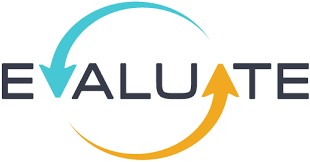

**Add ols Predictions Column to `ols_eval` dataframe**

```python
# Add a column to my ols_eval dataframe called 'ols_yhat'; I created these values above.

ols_eval['ols_yhat'] = ols_yhat
```

**Calculate and Add Residuals Column to `ols_eval` dataframe for Plotting**

```python
ols_eval['residuals'] = ols_eval.ols_yhat - ols_eval.actual
```

___

#### Compute the RMSE 

Using our Handy `ols_eval` DataFrame that we created above to hold our baseline and model predictions and residuals, we will now find out if our ols model's predictions can beat our baseline.

```python
from sklearn.metrics import mean_squared_error
from math import sqrt

baseline_RMSE = sqrt(mean_squared_error(ols_eval.actual, ols_eval.baseline_yhat))

ols_RMSE = sqrt(mean_squared_error(ols_eval.actual, ols_eval.ols_yhat))

print(f'My model has value: {ols_RMSE < baseline_RMSE}')
```

**Compute the R-squared and p-value for the Model we created and find out if our model has value.**

```python
ols_r2 = round(ols_model.rsquared,3)

ols_p_value = ols_model.f_pvalue

print(f'My R-squared score is significant: {ols_p_value < .05}')
```

**<font color=purple>If the RMSE for your ols model is smaller than the RMSE for your baseline, and your p-value is less than your alpha, your model has value.</font>**

___

#### Visualize Residuals

**Quick look at distribution of residuals**

```python
plt.hist(np.log(ols_eval.residuals))
```

**Look for Patterns in Actual vs Residuals**

```python
plt.scatter(ols_eval.actual, ols_eval.residuals)
```

**Look at Predictions vs Residuals**

```python
plt.scatter(ols_eval.ols_yhat, ols_eval.residuals)
```

___

If your first model beats your baseline, see how your model performs on your validate dataset. Then, you might try to beat your first model.

**Use the RMSE metric to compare the performance of successive models you build.**

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Feature Engineering, Feature Evaluation, and Feature Selection

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What is Feature Engineering?</font>**

**Feature Engineering** is when you construct a new feature or column in your dataset using data from other columns in your dataset. You might decide to combine or separate the data from other columns to create new features for use in a machine learning algorithm. **Domain knowledge and qualitative research can be great guides in this area.**

**Feature Evaluation** is an algorithmic way to measure the impact of a feature on a target variable.

___

### **<font color=orange>So What?</font>**

>The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering. - Luca Massaron


**You might want to engineer new features to:**

- prepare the proper input dataset to be compatible with your machine learning algorithm's requirements.


- improve the performance of your machine learning model.

___

### **<font color=green>Now What?</font>**

#### SelectKBest - Feature Selection

- Select K Best is a filter method that uses a statistical test to gauge usefulness of features and keep those with the highest correlation to the target variable and remove those that are highly correlated with each other.

**Create the KBest Object**

```python
k = number_of_features

kbest = SelectKBest(f_regression, k=k)
```

**Fit the KBest Object to Your train and test Data**

```python
kbest.fit(X_train, y_train)
```

**Use the KBest Object to Return SelectKBest Features**

```python
best_features = X_train.columns[kbest.get_support()].tolist()
```

**Use the KBest Object to Transform Your X_train Dataset if You Like**

```python
X_reduced = kbest.transform(X_train)
```

____

#### RFE - Recursive Feature Elimination

Recursive Feature Elimination is a wrapper method that takes in a ML algorithm and uses its performance to decide which features in your dataframe should be removed to achieve the best model evaluation.

**Create the Model Object (Linear Regression in this case)**

```python
lm = LinearRegression()
```

**Create the RFE Object**

```python
k = number_of_features

rfe = RFE(lm, k)
```

**Fit the RFE Object**

```python
rfe.fit(X_train, y_train)
```

**Use the RFE Object to Get a List of Your Best Features and Save List to `rfe_best` Variable**

```python
rfe_best = X_train.columns[rfe.support_].tolist()
```

**Save the RFE Rankings of Your Features to a Variable `rfe_var_rank` for Use in `rfe_rank_df` below**

```python
rfe_var_rank = rfe.ranking_
```

**Save the Names of Your Features to a Variable `rfe_var_names` for Use in `rfe_rank_df` below**
```python
rfe_var_names = X_train.columns.tolist()
```

**Create and Sort a DataFrame Using Above Variables to Check out the Ranking of the Variables**
```python
rfe_rank_df = pd.DataFrame({'variable': rfe_var_names, 
                            'ranking': rfe_var_rank}).sort_values('ranking')
```

**Use the RFE Object to Create an X_rfe_train DataFrame Using Only the Selected Features if You Like**

```python
X_rfe_train = pd.DataFrame(rfe.transform(X_train), columns=[rfe_best])
```

Check out this super cool article showing [Feature Engineering](https://medium.com/@whitcrrd/linear-regression-part-ii-eda-feature-engineering-e66ea8763538) in a Linear Regression project! Some pretty cool ideas here.

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

## Modeling

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What is a Linear Regression Model?</font>**

See [this](#model) detailed description of Linear regression and types of ML Algorithms that appears at the top of this notebook.

![linear regression image](https://higherlogicdownload.s3.amazonaws.com/IMWUC/UploadedImages/92757287-d116-4157-b004-c2a0aba1b048/linear-regression-in-machine-learning.png)

___

### **<font color=orange>So What?</font>**

There are two main ways to perform Linear Regression in Python, `Statsmodels` and `Scikit-Learn`. I used `Statsmodels ols` above, so I will use `Scikit-Learn` as an example here, so we can see both.

We will also look at a Polynomial Regression, which allows us to add powers of our original features as new features and can be useful for looking at non-linear data.

___

### **<font color=green>Now What?</font>**

![modeling diagram](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS73RDblcyE5fdaTccMffPON4kV3f60MeHRMg&usqp=CAU)

___

#### Scikit-Learn's Linear Regression to Model

```python
# Imports from sklearn

from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

from sklearn.linear_model import LinearRegression
```

**Create the Linear Regression Object**

```python
lm = LinearRegression()
```

**Fit the Linear Regression Object to X_train and y_train**

```python
lm.fit(X_train, y_train)
```

**Use the Linear Regression Object to Return Intercept and Coefficient Values**

```python
print('intercept: ', lm.intercept_)

print("coefficients: ", lm.coef_)
```

**Use the Linear Regression Object to Predict y Values**

```python
# Create the `lm_eval` dataframe using a copy of the y_train dataframe.

lm_eval = y_train.copy()

# Rename the target value `actual`

lm_eval.rename(columns={'home_value': 'actual'}, inplace=True)

# Predict on X_train and add `yhat_lm1` column to `lm_eval` dataframe.

lm_eval['yhat_lm1'] = lm.predict(X_train)

# Calculate the residuals for my lm (linear regression model) and add `residuals_lm1` column on `lm_eval` dataframe.

lm_eval['residuals_lm1'] = lm_eval.yhat_lm1 - lm_eval.actual
```

<a id='eval'></a>

___

#### Evaluate Your Linear Regression Model Using R-squared and RMSE

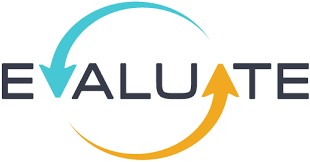

```python
# Calculate and display the RMSE for lm (linear regression model)

RMSE_lm1 = np.sqrt(mean_squared_error(lm_eval.actual, lm_eval.yhat_lm1))

print('The Root Mean Squared Error is {:.3}'.format(RMSE_lm1))

# Calculate and display the r-squared for my lm

r2_lm1 = r2_score(lm_eval.actual, lm_eval.yhat_lm1)

print('Using my Train dataset in my Linear Regression Model')

print()

print(f'{r2_lm1:.2%} of the variance in my target value can be explained by the features in my Linear Regression Model.')
```

**Repeat this process on your validate dataset to see how your model performs on unseen data.**

___

#### Polynomial Regression Model

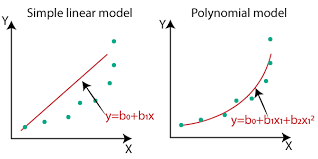

```python
# Imports from sklearn

from sklearn.preprocesing import PolynomialFeatures
```

**Create the Polynomial Features**

```python
poly = PolynomialFeatures(degree=2)
```

**Fit and Transform the Polynomial Features using X_train and Save in a DataFrame**

```python
poly.fit(X_train, y_train)

X_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names(X_train.columns))
```

**Use the Polynomial Features in a Linear Regression Model**

```python
# Create the lm object

lm = sklearn.linear_model.LinearRegression()

# Fit the lm object on X_poly and y_train

lm.fit(X_poly, y_train)

# Create a new column on your `lm_eval` dataframe to hold the predictions using polynomial regression model.

lm_eval['polynomial'] = lm.predict(X_poly)
```

**Evaluate Your LR Model with Polynomial Features Like You Did your first LR model [Above](#eval)**



**To make sure you haven't overfit your model to your train dataset and help decide if your model will do well with future, unseen datasets, use your validate dataset.**

**Finally, Predict and Evaluate your <font color=red>Best</font> Model on Your Test Dataset**

**I really enjoyed this [article](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491) on creating and using polynomial features in your Linear Regresssion. Check it out when you have a chance.**